In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns


In [4]:
data = pd.read_csv("../0) dataset/0) normal dataset/imdb.csv")

Ormai lo conosciamo... rimuovo le feature inutili e faccio alcune operazioni indipendenti prima di splittare

# Preprocessing iniziale (uguale su train e test)

In [5]:
data.drop(columns=["bestRating","worstRating","isRatable","endYear"],inplace=True)

In [6]:
data["rating"] = data["rating"].apply(lambda r: int(r[1]) if isinstance(r, str) and len(r) > 1 else None)

In [7]:
data['runtimeMinutes'] = pd.to_numeric(data['runtimeMinutes'], errors='coerce')

In [8]:
mapping = {
    'tvShort': 'short',  # solo dove viene trasmesso
    
    'tvSeries': 'Series',
    'tvMiniSeries': 'Series', # cambia solo numero episodi
    'tvEpisode': 'Series', # episodio di una serie 
    
    'tvMovie': 'movie', # solo dove viene trasmesso

    'video': 'other',   
    'videoGame': 'other',
    'tvSpecial': 'other'
}

# Creazione della nuova colonna groupedTitleType
data['groupedTitleType'] = data['titleType'].map(mapping).fillna(data['titleType'])
data['groupedTitleType'] = data['titleType'].map(mapping).fillna(data['titleType'])
data.drop(columns = ['titleType'], inplace=True)

In [9]:
data['countryOfOrigin'] = data['countryOfOrigin'].apply(
lambda x: x.strip("[]").replace("'", "").split(', ') if isinstance(x, str) else []
)

    
# Define the geographical mapping for each country code, including non-standard ones
country_region_mapping = {
    # Europe
    'AD': 'Europe', 'AL': 'Europe', 'AM': 'Europe', 'AT': 'Europe', 'AZ': 'Europe', 'BA': 'Europe', 'BE': 'Europe',
    'BG': 'Europe', 'BY': 'Europe', 'CH': 'Europe', 'CY': 'Europe', 'CZ': 'Europe', 'DE': 'Europe', 'DK': 'Europe',
    'EE': 'Europe', 'ES': 'Europe', 'FI': 'Europe', 'FR': 'Europe', 'GB': 'Europe', 'GE': 'Europe', 'GR': 'Europe',
    'HR': 'Europe', 'HU': 'Europe', 'IE': 'Europe', 'IS': 'Europe', 'IT': 'Europe', 'KZ': 'Europe', 'LI': 'Europe',
    'LT': 'Europe', 'LU': 'Europe', 'LV': 'Europe', 'MC': 'Europe', 'MD': 'Europe', 'ME': 'Europe', 'MK': 'Europe',
    'MT': 'Europe', 'NL': 'Europe', 'NO': 'Europe', 'PL': 'Europe', 'PT': 'Europe', 'RO': 'Europe', 'RS': 'Europe',
    'RU': 'Europe', 'SE': 'Europe', 'SI': 'Europe', 'SK': 'Europe', 'SM': 'Europe', 'UA': 'Europe', 'VA': 'Europe',
    'YUCS': 'Europe', 'CSHH': 'Europe', 'CSXX': 'Europe', 'XYU': 'Europe', 'DDDE': 'Europe', 'XKV': 'Europe',
    
    # North Africa
    'DZ': 'North Africa', 'EG': 'North Africa', 'EH': 'North Africa', 'LY': 'North Africa', 'MA': 'North Africa', 
    'SD': 'North Africa', 'TN': 'North Africa',

    # South Africa
    'ZA': 'South Africa', 'NA': 'South Africa', 'ZM': 'South Africa', 'ZW': 'South Africa', 'AO': 'South Africa',

    # North America
    'CA': 'North America', 'US': 'North America', 'MX': 'North America', 'GL': 'North America', 'CR': 'North America',
    'DO': 'North America', 'GD': 'North America', 'GT': 'North America', 'HN': 'North America', 'JM': 'North America',
    'NI': 'North America', 'PA': 'North America', 'PR': 'North America', 'SV': 'North America', 'TT': 'North America',

    # South America
    'AR': 'South America', 'BO': 'South America', 'BR': 'South America', 'CL': 'South America', 'CO': 'South America',
    'EC': 'South America', 'GY': 'South America', 'PY': 'South America', 'PE': 'South America', 'UY': 'South America',
    'VE': 'South America',

    # Asia
    'AF': 'Asia', 'AE': 'Asia', 'BD': 'Asia', 'BH': 'Asia', 'BN': 'Asia', 'BT': 'Asia', 'CN': 'Asia', 'HK': 'Asia',
    'ID': 'Asia', 'IL': 'Asia', 'IN': 'Asia', 'IQ': 'Asia', 'IR': 'Asia', 'JO': 'Asia', 'JP': 'Asia', 'KG': 'Asia',
    'KH': 'Asia', 'KR': 'Asia', 'KW': 'Asia', 'KZ': 'Asia', 'LA': 'Asia', 'LB': 'Asia', 'LK': 'Asia', 'MM': 'Asia',
    'MN': 'Asia', 'MO': 'Asia', 'MY': 'Asia', 'NP': 'Asia', 'OM': 'Asia', 'PH': 'Asia', 'PK': 'Asia', 'QA': 'Asia',
    'SA': 'Asia', 'SG': 'Asia', 'SY': 'Asia', 'TH': 'Asia', 'TJ': 'Asia', 'TM': 'Asia', 'TW': 'Asia', 'UZ': 'Asia',
    'VN': 'Asia', 'YE': 'Asia', 'XWG': 'Asia',

    # Australia/Oceania
    'AU': 'Australia/Oceania', 'FJ': 'Australia/Oceania', 'NZ': 'Australia/Oceania', 'PG': 'Australia/Oceania', 
    'SB': 'Australia/Oceania', 'TO': 'Australia/Oceania', 'VC': 'Australia/Oceania', 'VU': 'Australia/Oceania',

    # Middle East (if not categorized in Asia)
    'PS': 'Middle East'
}

# Function to map each country in 'countryOfOrigin' to its region
def map_country_to_region(countries):
    regions = set()  # Use a set to avoid duplicates in case of multiple countries
    for country in countries:
        region = country_region_mapping.get(country, 'Unknown')
        regions.add(region)
    return list(regions)

# Apply the mapping function to 'countryOfOrigin' and create a new column 'Region'
data['Region'] = data['countryOfOrigin'].apply(map_country_to_region)

# Display sample rows to confirm the addition of the 'Region' column
data[['countryOfOrigin', 'Region']].head()

,countryOfOrigin,Region
0,[US],[North America]
1,[FR],[Europe]
2,[US],[North America]
3,[US],[North America]
4,[FR],[Europe]


In [10]:
data.drop(columns = ['countryOfOrigin'], inplace=True)

# Splitting

In [11]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)

# Ora lavoro su train_df

In [12]:
data = train_df

## Trasformazione logaritmica train

In [13]:
from scipy.stats import skew

In [14]:
numerical_columns = list(np.unique(data.select_dtypes(include=['float64','int64']).columns))

In [15]:
numerical_columns.remove("isAdult")
numerical_columns.remove("rating")

In [16]:
numerical_columns

['averageRating',
 'awardNominationsExcludeWins',
 'awardWins',
 'castNumber',
 'companiesNumber',
 'criticReviewsTotal',
 'directorsCredits',
 'externalLinks',
 'numRegions',
 'numVotes',
 'quotesTotal',
 'ratingCount',
 'runtimeMinutes',
 'startYear',
 'totalCredits',
 'totalImages',
 'totalVideos',
 'userReviewsTotal',
 'writerCredits']

In [17]:
transformed = []  # salvo colonne da trasformare dopo
for col in numerical_columns:
    skewness = skew(data[col])
    if skewness>2:  # imposto limite di skewness (valore distr. esponenziale). Se superato -> trasformo
        data[col] = np.log1p(data[col])  # log1p to handle zero values
        data.rename(columns={col: col+"Log"}, inplace=True) # cambio il nome per tenere traccia trasformazione
        transformed.append(col)

In [18]:
np.unique(data.select_dtypes(include=['float64','int64']).columns)

array(['averageRating', 'awardNominationsExcludeWinsLog', 'awardWinsLog',
       'castNumberLog', 'companiesNumberLog', 'criticReviewsTotalLog',
       'directorsCreditsLog', 'externalLinksLog', 'isAdult',
       'numRegionsLog', 'numVotesLog', 'quotesTotalLog', 'rating',
       'ratingCountLog', 'runtimeMinutes', 'startYear', 'totalCreditsLog',
       'totalImagesLog', 'totalVideosLog', 'userReviewsTotalLog',
       'writerCreditsLog'], dtype=object)

## One hot encoding genres

In [19]:
data['genres'] = data['genres'].str.split(',')

# Conteggio della frequenza di ciascun genere
from collections import Counter

genre_counts = Counter(genre for sublist in data['genres'] for genre in sublist)

# Soglia minima di frequenza
threshold = int(data.shape[0]*0.1)

# Identificazione dei generi rari
rare_genres = {genre for genre, count in genre_counts.items() if count < threshold}

# Sostituzione dei generi rari con "Altro"
data['genres'] = data['genres'].apply(lambda x: ['others' if genre in rare_genres else genre for genre in x])

# Estrazione di tutti i generi unici dopo la sostituzione
unique_genres = set(genre for sublist in data['genres'] for genre in sublist)

# Creazione delle colonne per one-hot encoding
for genre in unique_genres:
    data[genre] = data['genres'].apply(lambda x: int(genre in x))

## Valori mancanti

In [20]:
# Replace \N with np.nan to mark them as null values
data.replace('\\N', np.nan, inplace=True)

# Check for null values in each column
null_values = data.isnull().sum()


null_values = data.isnull().sum()

# Display the number of null values per column
print(null_values)

originalTitle                         0
rating                                0
startYear                             0
runtimeMinutes                    28083
awardWinsLog                          0
numVotesLog                           0
totalImagesLog                        0
totalVideosLog                        0
totalCreditsLog                       0
criticReviewsTotalLog                 0
awardNominationsExcludeWinsLog        0
canHaveEpisodes                       0
isAdult                               0
numRegionsLog                         0
userReviewsTotalLog                   0
ratingCountLog                        0
genres                                0
castNumberLog                         0
companiesNumberLog                    0
averageRating                         0
regions                               0
externalLinksLog                      0
writerCreditsLog                      0
directorsCreditsLog                   0
soundMixes                            0


runtimeMinutes lo imputiamo dopo, gli per il momento rimangono così.

# Mapping categoriche (come DM1)

### One-hot encoding groupedTitleType

In [21]:
# Loop through each unique value in 'groupedTitleType'
for t in np.unique(data['groupedTitleType']):
    print(t)
    # Create a new column for each unique title type where the column is 1 if the row matches 't', otherwise 0
    data[t] = (data['groupedTitleType'] == t).astype(int)

Series
movie
other
short


## Imputazione runtimeMinutes (su train)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold

In [23]:
missing = data[data["runtimeMinutes"].isnull()==True]

In [24]:
non_missing = data[data["runtimeMinutes"].isnull()==False]

In [25]:
attributes = list(np.unique(data.select_dtypes(include=['float64','int64','int32']).columns))
attributes.remove("rating") # c'è già averageRating
attributes.remove("runtimeMinutes")

In [26]:
sorted(attributes)

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Series',
 'Short',
 'averageRating',
 'awardNominationsExcludeWinsLog',
 'awardWinsLog',
 'castNumberLog',
 'companiesNumberLog',
 'criticReviewsTotalLog',
 'directorsCreditsLog',
 'externalLinksLog',
 'isAdult',
 'movie',
 'numRegionsLog',
 'numVotesLog',
 'other',
 'others',
 'quotesTotalLog',
 'ratingCountLog',
 'short',
 'startYear',
 'totalCreditsLog',
 'totalImagesLog',
 'totalVideosLog',
 'userReviewsTotalLog',
 'writerCreditsLog']

In [27]:
target = 'runtimeMinutes'

Levo outliers più grossi solo per imputazione

In [28]:
non_missing = non_missing[non_missing["runtimeMinutes"]<300]

In [29]:
X,y = non_missing[attributes].values,non_missing[target].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.fit_transform(y_test.reshape(-1, 1))

### Decision Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [33]:
param_distributions  = {
    "min_samples_split": [5, 10,20],  # Minimo numero di campioni per dividere un nodo
    "min_samples_leaf": [10,20,50],  # Minimo numero di campioni in una foglia
}

# Creazione del modello base
base_model = DecisionTreeRegressor(random_state=42,criterion="friedman_mse")

# Definizione della validazione incrociata
cv = KFold(n_splits=3)

random_search = RandomizedSearchCV(
    base_model,
    param_distributions=param_distributions,
    n_iter= 10,  # Numero di combinazioni casuali da testare
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42,
    refit=True,
)

# Adattamento del Grid Search al dataset completo
random_search.fit(X_train, y_train)

# Migliori parametri trovati
print("Migliori parametri trovati:", random_search.best_params_)

# Miglior modello
best_model = random_search.best_estimator_

# Previsioni sul dataset di test
y_pred = best_model.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Migliori parametri trovati: {'min_samples_split': 5, 'min_samples_leaf': 50}


In [34]:
zipped = zip(attributes, best_model.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
print("Classifica variabili:")
print("")
attributes = []
for col, imp in zipped:
    print(col, "%2.2f"%(imp*100))
    if imp>0.005:
        attributes.append(col)

Classifica variabili:

movie 64.48
short 8.28
Series 4.02
Short 3.83
castNumberLog 3.44
Animation 3.23
startYear 2.29
Comedy 1.96
Documentary 1.16
companiesNumberLog 0.83
averageRating 0.67
totalCreditsLog 0.66
Drama 0.63
ratingCountLog 0.60
writerCreditsLog 0.46
numRegionsLog 0.43
totalImagesLog 0.38
externalLinksLog 0.37
numVotesLog 0.31
userReviewsTotalLog 0.29
others 0.29
criticReviewsTotalLog 0.28
isAdult 0.27
Action 0.24
directorsCreditsLog 0.21
awardNominationsExcludeWinsLog 0.14
Crime 0.09
Adventure 0.09
totalVideosLog 0.04
quotesTotalLog 0.03
awardWinsLog 0.01
other 0.00


In [35]:
X = non_missing[attributes].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.fit_transform(y_test.reshape(-1, 1))

In [37]:
param_distributions  = {
    "max_depth": [12,13,14,15,16, None],  # Profondità massima dell'albero
    "min_samples_split": np.arange(2,8,1),  # Minimo numero di campioni per dividere un nodo
    "min_samples_leaf": np.arange(2,30,2),  # Minimo numero di campioni in una foglia
}

# Creazione del modello base
base_model = DecisionTreeRegressor(random_state=42,criterion="friedman_mse")

# Definizione della validazione incrociata
cv = KFold(n_splits=5)

random_search = RandomizedSearchCV(
    base_model,
    param_distributions=param_distributions,
    n_iter= 100,  # Numero di combinazioni casuali da testare
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42,
    refit=True,
)

# Adattamento del Grid Search al dataset completo
random_search.fit(X_train, y_train)

# Migliori parametri trovati
print("Migliori parametri trovati:", random_search.best_params_)

# Miglior modello
best_model = random_search.best_estimator_

Migliori parametri trovati: {'min_samples_split': 2, 'min_samples_leaf': 26, 'max_depth': 12}


In [38]:
# Previsioni sul dataset di test
y_pred = best_model.predict(X_test)
mean_error = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error score sul dataset di test: {mean_error}")
print(f"mean_absolute_error score sul dataset di test: {mean_absolute_error(y_test, y_pred)}")

mean_squared_error score sul dataset di test: 0.005537703272210673
mean_absolute_error score sul dataset di test: 0.04386049172837162


### Regressione Knn

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
param_distributions = {
    "n_neighbors": np.arange(5, 15,1), # dopo alcuni tentativi sistemato range
    "metric": ["manhattan"],  # modificato a posteriori (tolto euclidean)
    "weights": ["distance"]  # modificato a posteriori (tolto uniform)
}

cv = KFold(n_splits=3)
base_model = KNeighborsRegressor()
random_search = RandomizedSearchCV(
    base_model,
    param_distributions=param_distributions,
    n_iter= 20,  # Numero di combinazioni casuali da testare
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42,
    refit=True,
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

In [41]:
y_pred = clf.predict(X_test)
print('MSE: %.5f' % mean_squared_error(y_test, y_pred))
print('MAE: %.5f' % mean_absolute_error(y_test, y_pred))

MSE: 0.00513
MAE: 0.04094


### Imputazione con knn

In [42]:
X_imputazione = scaler.fit_transform(missing[attributes])
y_imputazione = clf.predict(X_imputazione)
missing.loc[:, target] = y_imputazione*np.max(non_missing[target])

(array([ 432.,  685., 1116., 1532., 2859., 2365., 2119., 2476., 2845.,
        2405., 1516., 1198.,  870.,  757.,  695.,  671.,  736.,  754.,
         629.,  428.,  328.,  194.,  127.,   78.,   63.,   42.,   39.,
          28.,   24.]),
 array([0.        , 0.02758621, 0.05517241, 0.08275862, 0.11034483,
        0.13793103, 0.16551724, 0.19310345, 0.22068966, 0.24827586,
        0.27586207, 0.30344828, 0.33103448, 0.35862069, 0.3862069 ,
        0.4137931 , 0.44137931, 0.46896552, 0.49655172, 0.52413793,
        0.55172414, 0.57931034, 0.60689655, 0.63448276, 0.66206897,
        0.68965517, 0.71724138, 0.74482759, 0.77241379, 0.8       ]),
 <BarContainer object of 29 artists>)

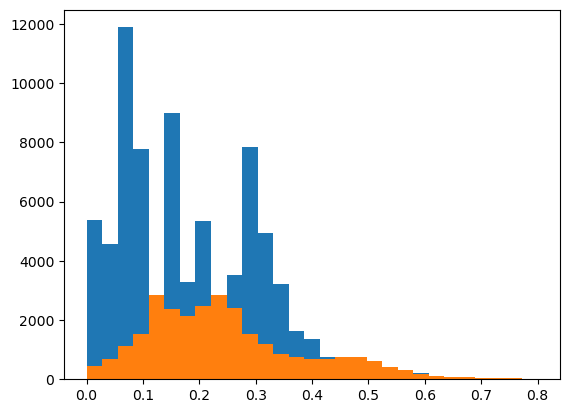

In [43]:
plt.hist(scaler.fit_transform(y.reshape(-1, 1)),bins=np.linspace(0,0.8,30))
plt.hist(scaler.fit_transform(missing[target].values.reshape(-1, 1)),bins=np.linspace(0,0.8,30))

Risultato migliore (score), salvo imputazione Knn.

In [44]:
data = pd.concat([missing, non_missing], ignore_index=True)

## Outlier detection

### Isolation Forest su tutte le variabili (anche categoriche one-hot encoded)

In [46]:
from pyod.models.iforest import IsolationForest
from sklearn.decomposition import PCA

In [47]:
num_columns = np.unique(data.select_dtypes(include=['float64','int64','int32']).columns)

In [48]:
len(num_columns)

34

In [49]:
X = scaler.fit_transform(data[num_columns])

In [50]:
IsF = IsolationForest(random_state=0,contamination=0.1,max_samples=300,n_estimators=2000,n_jobs=-1)
IsF.fit(X)

IsolationForest(contamination=0.1, max_samples=300, n_estimators=2000,
                n_jobs=-1, random_state=0)

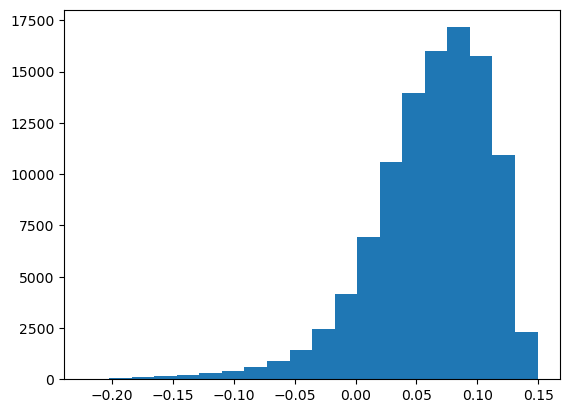

In [51]:
scores = IsF.decision_function(X)
plt.hist(scores, bins=20)
plt.show()

In [52]:
from pyod.models.hbos import HBOS

In [53]:
hbos = HBOS(contamination=0.01)

hbos.fit(X)

HBOS(alpha=0.1, contamination=0.01, n_bins=10, tol=0.5)

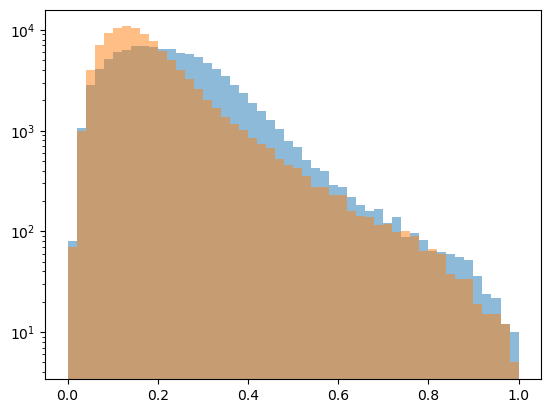

In [54]:
S1,S2 = scaler.fit_transform(-scores.reshape(-1,1)),scaler.fit_transform(hbos.decision_function(X).reshape(-1,1))
plt.hist(S1, bins=50,alpha=0.5)
plt.hist(S2, bins=50,alpha=0.5)
plt.yscale("log")
plt.show()

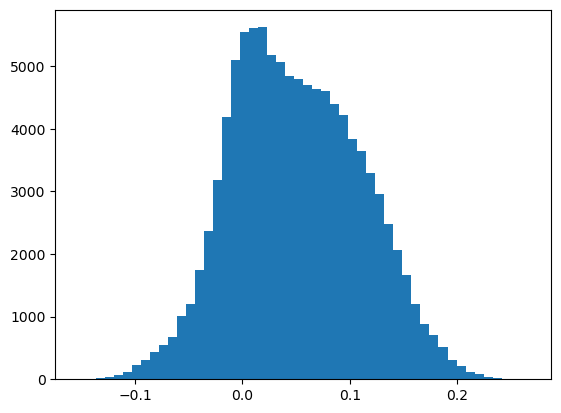

In [55]:
plt.hist(S1-S2, bins=50,alpha=1)
plt.show()

Sono simili, tanto vale usarne uno solo secondo me. Preferisco isolation forest perchè HBOS assume indipendenza delle variabili ma in generale non è vero. 

In [56]:
scores = S1
out_threshold = np.percentile(scores, 99.5) 

outlier_flags = (scores >= out_threshold).astype(int)

In [57]:
data.describe()

,rating,startYear,runtimeMinutes,awardWinsLog,numVotesLog,totalImagesLog,totalVideosLog,totalCreditsLog,criticReviewsTotalLog,awardNominationsExcludeWinsLog,...,Adventure,Drama,others,Comedy,Short,Documentary,Series,movie,other,short
count,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,...,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000,104529.000000
mean,6.318553,1994.906103,53.418283,0.098742,3.845656,1.154971,0.076352,3.476247,0.365229,0.115704,...,0.118953,0.345789,0.507132,0.318161,0.112543,0.110620,0.545772,0.288963,0.053889,0.111376
std,1.373975,24.906003,35.574360,0.381562,1.668548,1.145360,0.306511,1.100500,0.804653,0.427217,...,0.323734,0.475627,0.499952,0.465764,0.316035,0.313663,0.497903,0.453283,0.225800,0.314598
min,0.000000,1878.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1981.000000,25.000000,0.000000,2.564949,0.693147,0.000000,2.833213,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1999.000000,45.000000,0.000000,3.367296,0.693147,0.000000,3.555348,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.000000,2015.000000,81.235996,0.000000,4.682131,1.609438,0.000000,4.174387,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,9.000000,2024.000000,298.000000,6.102559,14.896614,9.932415,6.856462,10.135353,6.444131,6.478510,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
data[outlier_flags==1].describe()

,rating,startYear,runtimeMinutes,awardWinsLog,numVotesLog,totalImagesLog,totalVideosLog,totalCreditsLog,criticReviewsTotalLog,awardNominationsExcludeWinsLog,...,Adventure,Drama,others,Comedy,Short,Documentary,Series,movie,other,short
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,6.550669,1999.491396,100.621617,1.758709,11.097753,5.123331,1.950320,6.096156,4.351355,2.474139,...,0.304015,0.506692,0.611855,0.344168,0.001912,0.022945,0.202677,0.753346,0.040153,0.003824
std,1.078710,19.431021,37.412393,1.179957,1.301855,1.040935,1.089501,0.898847,1.197732,1.211837,...,0.460430,0.500434,0.487795,0.475551,0.043727,0.149870,0.402379,0.431476,0.196506,0.061780
min,1.000000,1903.000000,4.000000,0.000000,7.128496,0.000000,0.000000,3.258097,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1989.000000,87.000000,0.693147,10.273100,4.543295,1.098612,5.480604,3.795426,1.609438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,7.000000,2004.000000,107.000000,1.609438,11.106235,5.105945,1.791759,6.068426,4.644391,2.484907,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.000000,2014.000000,123.000000,2.484907,12.033544,5.590987,2.772589,6.663761,5.164786,3.295837,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.000000,2024.000000,197.000000,5.857933,14.896614,9.932415,6.513230,10.135353,6.444131,6.478510,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
data[outlier_flags==0].describe()

,rating,startYear,runtimeMinutes,awardWinsLog,numVotesLog,totalImagesLog,totalVideosLog,totalCreditsLog,criticReviewsTotalLog,awardNominationsExcludeWinsLog,...,Adventure,Drama,others,Comedy,Short,Documentary,Series,movie,other,short
count,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,...,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000,104006.000000
mean,6.317386,1994.883045,53.180919,0.090395,3.809189,1.135016,0.066928,3.463072,0.345185,0.103844,...,0.118022,0.344980,0.506605,0.318030,0.113099,0.111061,0.547497,0.286628,0.053958,0.111917
std,1.375205,24.928438,35.406399,0.354129,1.588630,1.110594,0.265925,1.085563,0.750480,0.384644,...,0.322636,0.475364,0.499959,0.465713,0.316716,0.314209,0.497741,0.452188,0.225937,0.315265
min,0.000000,1878.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1981.000000,24.914339,0.000000,2.564949,0.693147,0.000000,2.833213,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1999.000000,45.000000,0.000000,3.367296,0.693147,0.000000,3.555348,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.000000,2015.000000,81.000000,0.000000,4.663439,1.609438,0.000000,4.174387,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,9.000000,2024.000000,298.000000,6.102559,12.202436,8.500047,6.856462,8.890411,5.717028,4.836282,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# data.to_csv(r"C:\Users\aless\OneDrive\Desktop\DM_2\datasets\train_tabular.csv")
data.to_csv("../0) dataset/1) preprocessed dataset/train_preprocessed.csv")

### Tolgo outliers

In [61]:
data = data[outlier_flags==0]

# Salvo train e procedo con test

In [62]:
# data.to_csv(r"C:\Users\aless\OneDrive\Desktop\DM_2\datasets\train_tabular_no_out.csv")
data.to_csv("../0) dataset/2) preprocessed e no outliers dataset/train_preprocessed_nooutliers.csv")

In [63]:
data = test_df

In [64]:
data.columns

Index(['originalTitle', 'rating', 'startYear', 'runtimeMinutes', 'awardWins',
       'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'awardNominationsExcludeWins', 'canHaveEpisodes',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'genres',
       'castNumber', 'companiesNumber', 'averageRating', 'regions',
       'externalLinks', 'writerCredits', 'directorsCredits', 'soundMixes',
       'quotesTotal', 'groupedTitleType', 'Region'],
      dtype='object')

## Stesse trasformazioni

In [65]:
for col in transformed:
    data[col] = np.log1p(data[col])  # log1p to handle zero values
    data.rename(columns={col: col+"Log"}, inplace=True) # cambio il nome per tenere traccia trasformazione

In [66]:
data.columns

Index(['originalTitle', 'rating', 'startYear', 'runtimeMinutes',
       'awardWinsLog', 'numVotesLog', 'totalImagesLog', 'totalVideosLog',
       'totalCreditsLog', 'criticReviewsTotalLog',
       'awardNominationsExcludeWinsLog', 'canHaveEpisodes', 'isAdult',
       'numRegionsLog', 'userReviewsTotalLog', 'ratingCountLog', 'genres',
       'castNumberLog', 'companiesNumberLog', 'averageRating', 'regions',
       'externalLinksLog', 'writerCreditsLog', 'directorsCreditsLog',
       'soundMixes', 'quotesTotalLog', 'groupedTitleType', 'Region'],
      dtype='object')

In [67]:
data['genres'] = data['genres'].str.split(',')

# Conteggio della frequenza di ciascun genere
from collections import Counter

genre_counts = Counter(genre for sublist in data['genres'] for genre in sublist)

# Soglia minima di frequenza
threshold = int(data.shape[0]*0.1)

# Identificazione dei generi rari
rare_genres = {genre for genre, count in genre_counts.items() if count < threshold}

# Sostituzione dei generi rari con "Altro"
data['genres'] = data['genres'].apply(lambda x: ['others' if genre in rare_genres else genre for genre in x])

# Estrazione di tutti i generi unici dopo la sostituzione
unique_genres = set(genre for sublist in data['genres'] for genre in sublist)

# Creazione delle colonne per one-hot encoding
for genre in unique_genres:
    data[genre] = data['genres'].apply(lambda x: int(genre in x))

In [68]:
# Loop through each unique value in 'groupedTitleType'
for t in np.unique(data['groupedTitleType']):
    print(t)
    # Create a new column for each unique title type where the column is 1 if the row matches 't', otherwise 0
    data[t] = (data['groupedTitleType'] == t).astype(int)

Series
movie
other
short


# Imputazione e rimozione outliers con modelli addestrati nel train

## Imputazione runtimeMinutes

In [69]:
missing = data[data[target].isnull()==True]
non_missing = data[data[target].isnull()==False]

In [70]:
X_imputazione = scaler.fit_transform(missing[attributes])
y_imputazione = clf.predict(X_imputazione)
missing.loc[:, target] = y_imputazione*np.max(non_missing[target])

In [71]:
data = pd.concat([missing, non_missing], ignore_index=True)

## Rimozione outliers

In [72]:
X = scaler.fit_transform(data[num_columns])

In [73]:
scores = scaler.fit_transform(-IsF.decision_function(X).reshape(-1,1))

In [74]:
outlier_flags = (scores >= out_threshold).astype(int)

In [75]:
np.unique(outlier_flags,return_counts=True)

(array([0, 1]), array([44663,   197]))

In [76]:
# data.to_csv(r"C:\Users\aless\OneDrive\Desktop\DM_2\datasets\test_tabular.csv")
data.to_csv("../0) dataset/1) preprocessed dataset/test_preprocessed.csv")

In [77]:
data = data[outlier_flags==0]

In [78]:
# data.to_csv(r"C:\Users\aless\OneDrive\Desktop\DM_2\datasets\test_tabular_no_out.csv")
data.to_csv("../0) dataset/2) preprocessed e no outliers dataset/test_preprocessed_nooutliers.csv")

## Considerazioni satistiche

In [79]:
n_outliers = 861
tot = 861+43999

In [80]:
n_outliers_rel = n_outliers/tot

In [81]:
rel = (.02-n_outliers_rel)/n_outliers_rel
rel

0.04204413472706151

In [82]:
d_sigma = rel/(n_outliers**-0.5)
d_sigma

1.233692699629703

Senza contare errore su stima threshold, direi che il numero di outliers osservato è compatibile con le attese

In [83]:
data.columns

Index(['originalTitle', 'rating', 'startYear', 'runtimeMinutes',
       'awardWinsLog', 'numVotesLog', 'totalImagesLog', 'totalVideosLog',
       'totalCreditsLog', 'criticReviewsTotalLog',
       'awardNominationsExcludeWinsLog', 'canHaveEpisodes', 'isAdult',
       'numRegionsLog', 'userReviewsTotalLog', 'ratingCountLog', 'genres',
       'castNumberLog', 'companiesNumberLog', 'averageRating', 'regions',
       'externalLinksLog', 'writerCreditsLog', 'directorsCreditsLog',
       'soundMixes', 'quotesTotalLog', 'groupedTitleType', 'Region', 'Crime',
       'Action', 'Animation', 'Drama', 'Adventure', 'others', 'Comedy',
       'Short', 'Documentary', 'Series', 'movie', 'other', 'short'],
      dtype='object')